In [3]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_curve, auc
)
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.ensemble import RandomForestClassifier

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [4]:
original = pd.read_csv('Smart_Home_Data.csv')

In [5]:
pd.set_option('display.max_columns', None)
original.head(20)

,ID,Individuals,Adults,Region,OpenFridge,UsedOven,CupsCoffee,CoffeeStrength,StepsDay,SleepNight,Weather,Product1,Product2,Product3,InAppPurchase,SalesVol,AppFaceTime,UserSat,NPS
0,4261,4.0,2.0,NL,21.0,5.0,13.0,3.0,4580,7.0,Average,4.0,10.0,11.0,99,269.0,2820.0,7,7
1,2,4.0,2.0,GER,14.0,2.0,11.0,2.0,5750,8.0,Sunny,7.0,15.0,9.0,No,0.0,0.0,5,3
2,9,NaN,2.0,GER,14.0,2.0,10.0,2.0,4610,8.0,Rainy,4.0,10.0,0.0,No,0.0,0.0,5,3
3,10,1.0,1.0,UK,12.0,2.0,11.0,2.0,5545,8.0,Average,6.0,11.0,9.0,No,0.0,123.0,4,1
4,11,3.0,2.0,GER,13.0,2.0,10.0,2.0,4265,8.0,Sunny,4.0,10.0,0.0,No,0.0,300.0,5,2
5,15,NaN,1.0,UK,13.0,1.0,0.0,0.0,4975,12.0,Average,5.0,10.0,8.0,No,0.0,0.0,5,2
6,33,1.0,1.0,GER,12.0,2.0,13.0,2.0,3950,7.0,Sunny,3.0,9.0,0.0,No,0.0,0.0,4,1
7,34,2.0,1.0,GER,14.0,3.0,0.0,0.0,4975,12.0,Sunny,5.0,10.0,9.0,No,0.0,420.0,5,3
8,35,2.0,2.0,UK,13.0,2.0,0.0,0.0,4040,7.0,Rainy,3.0,9.0,0.0,No,0.0,420.0,5,2
9,38,2.0,2.0,GER,14.0,2.0,6.0,2.0,6305,9.0,Sunny,8.0,14.0,10.0,No,0.0,0.0,5,3


In [6]:
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5424 entries, 0 to 5423
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              5424 non-null   int64  
 1   Individuals     5413 non-null   float64
 2   Adults          5416 non-null   float64
 3   Region          5418 non-null   object 
 4   OpenFridge      5417 non-null   float64
 5   UsedOven        5414 non-null   float64
 6   CupsCoffee      5418 non-null   float64
 7   CoffeeStrength  5418 non-null   float64
 8   StepsDay        5424 non-null   int64  
 9   SleepNight      5411 non-null   float64
 10  Weather         5405 non-null   object 
 11  Product1        5417 non-null   float64
 12  Product2        5411 non-null   float64
 13  Product3        5408 non-null   float64
 14  InAppPurchase   5404 non-null   object 
 15  SalesVol        5411 non-null   float64
 16  AppFaceTime     5401 non-null   float64
 17  UserSat         5424 non-null   i

In [7]:
original.describe()

,ID,Individuals,Adults,OpenFridge,UsedOven,CupsCoffee,CoffeeStrength,StepsDay,SleepNight,Product1,Product2,Product3,SalesVol,AppFaceTime,UserSat,NPS
count,5424.000000,5413.00000,5416.000000,5417.000000,5414.000000,5418.000000,5418.000000,5424.000000,5411.000000,5417.000000,5411.000000,5408.000000,5411.000000,5401.000000,5424.000000,5424.000000
mean,2712.500000,2.97118,1.920790,18.419974,4.309383,10.363418,1.709487,5489.057891,8.206247,4.573195,10.221955,10.398114,149.203105,1631.877430,6.266777,5.424226
std,1565.918261,1.59704,1.352199,14.256432,1.380553,95.553610,1.610535,8611.465227,1.538527,1.721531,1.246839,4.123215,259.225669,1383.656951,1.855810,2.934180
min,1.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,7.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1356.750000,2.00000,2.000000,15.000000,4.000000,8.000000,1.000000,4620.000000,8.000000,4.000000,10.000000,10.000000,20.000000,360.000000,5.000000,3.000000
50%,2712.500000,3.00000,2.000000,19.000000,5.000000,10.000000,2.000000,4960.000000,8.000000,5.000000,10.000000,12.000000,85.000000,1620.000000,6.000000,5.000000
75%,4068.250000,3.00000,2.000000,21.000000,5.000000,11.000000,2.000000,5390.000000,8.000000,6.000000,11.000000,13.000000,174.500000,2460.000000,7.000000,7.000000
max,5424.000000,99.00000,99.000000,1025.000000,7.000000,5624.000000,99.000000,281170.000000,99.000000,10.000000,16.000000,15.000000,6000.000000,22520.000000,99.000000,99.000000


In [8]:
original.isna().sum()

ID                 0
Individuals       11
Adults             8
Region             6
OpenFridge         7
UsedOven          10
CupsCoffee         6
CoffeeStrength     6
StepsDay           0
SleepNight        13
Weather           19
Product1           7
Product2          13
Product3          16
InAppPurchase     20
SalesVol          13
AppFaceTime       23
UserSat            0
NPS                0
dtype: int64

In [9]:
original.duplicated().sum()

0

In [10]:
original.dropna(inplace=True)

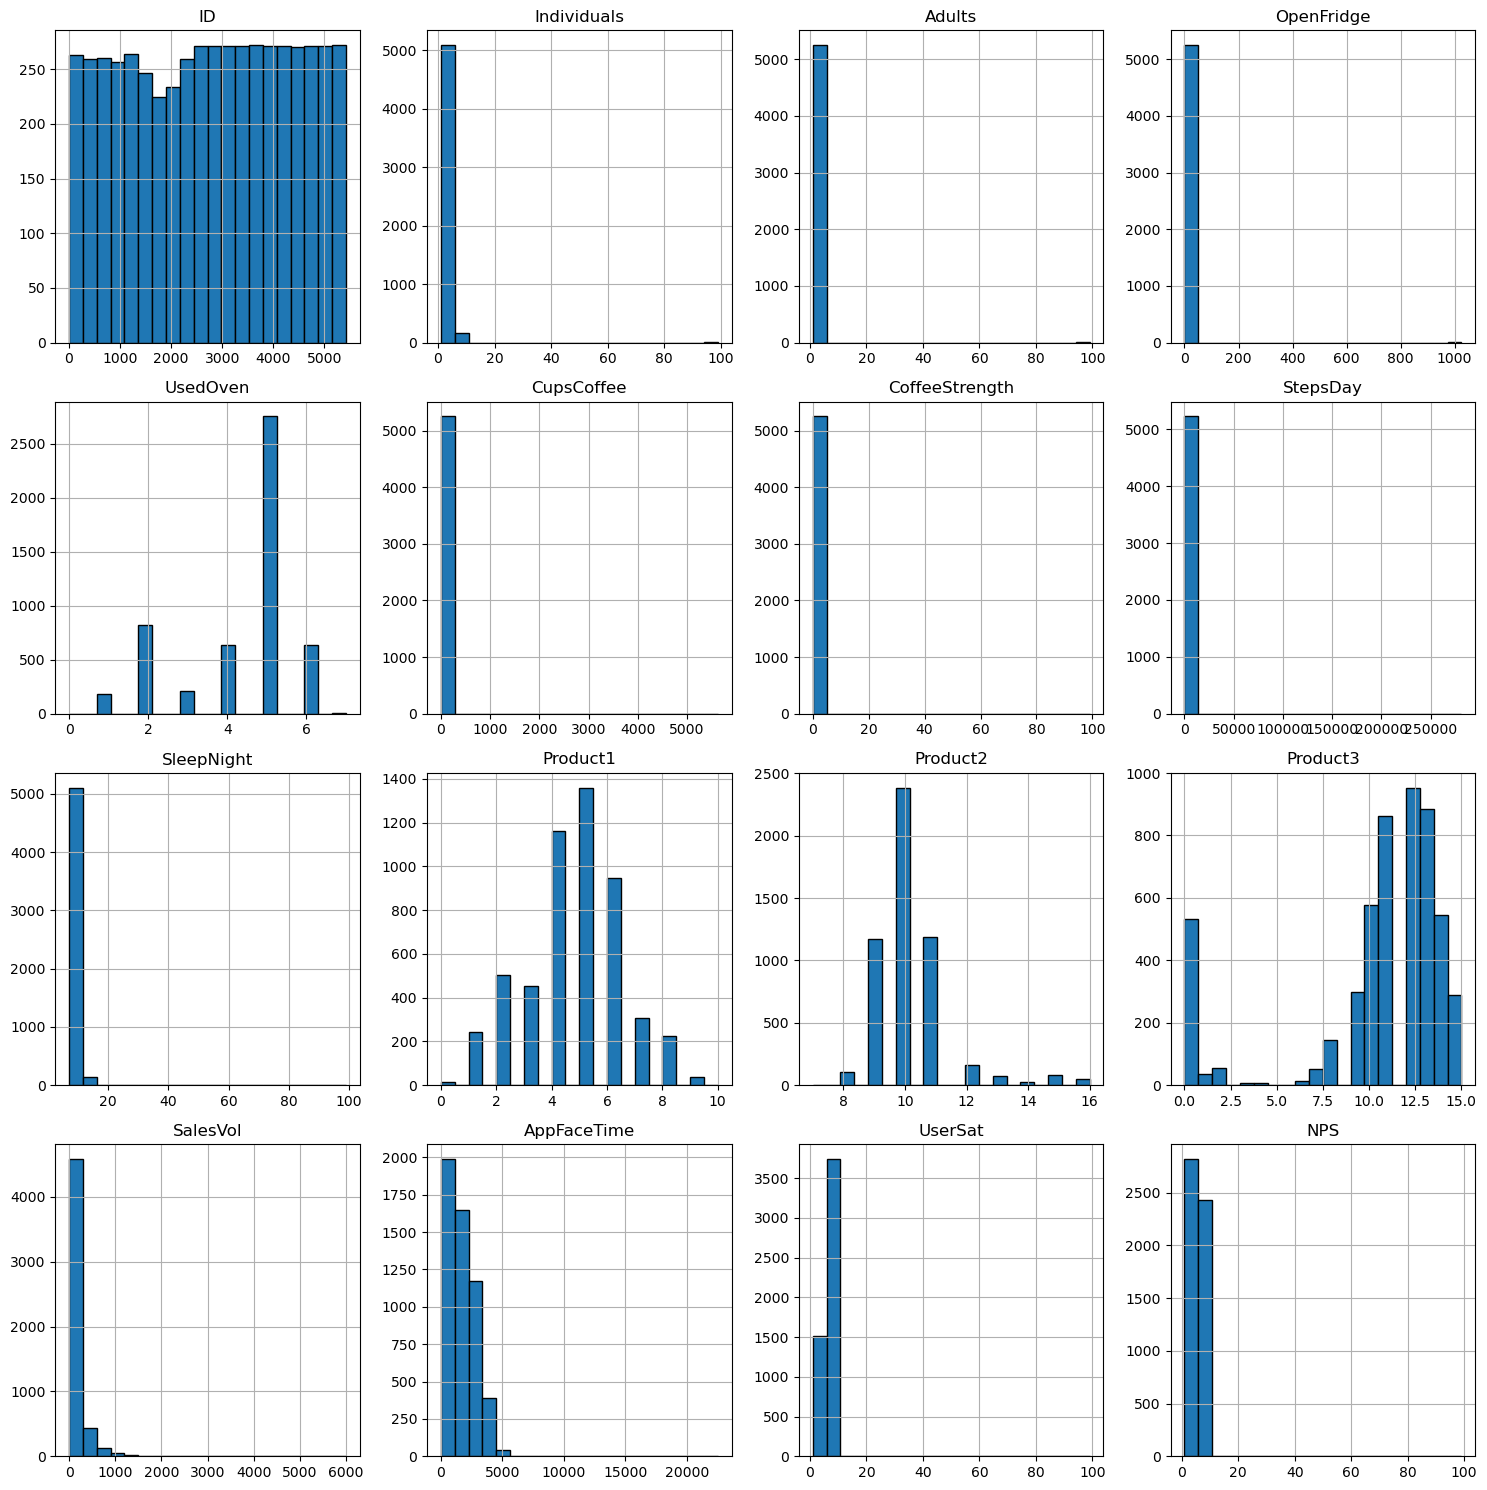

In [11]:
numerical_columns = original.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms for all numerical columns
original[numerical_columns].hist(figsize=(15, 15), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()

In [12]:
# Filter rows where 'Individuals' is between 1 and 6 (inclusive)
original = original[(original['Individuals'] >= 1) & (original['Individuals'] <= 6)]

# Optional: Reset the index after filtering
original.reset_index(drop=True, inplace=True)

In [13]:
# Filter rows where 'Adults' is between 1 and 2 (inclusive)
original = original[(original['Adults'] >= 1) & (original['Adults'] <= 2)]

# Optional: Reset the index after filtering
original.reset_index(drop=True, inplace=True)

In [14]:
# Filter rows where 'CoffeeStrength' is between 1 and 3 (inclusive)
original = original[(original['CoffeeStrength'] >= 1) & (original['CoffeeStrength'] <= 3)]

# Optional: Reset the index after filtering
original.reset_index(drop=True, inplace=True)

In [15]:
# Clip the 'UserSat' column to have a maximum value of 10 and a minimum value of 1
original['UserSat'] = original['UserSat'].clip(lower=1, upper=10)

In [16]:
# Clip the 'NPS' column to have a maximum value of 10 and a minimum value of 0
original['NPS'] = original['NPS'].clip(lower=0, upper=10)

In [17]:
original.drop(columns=['ID'], inplace=True)

In [18]:
original.describe().T

,count,mean,std,min,25%,50%,75%,max
Individuals,4449.0,2.966734,0.920524,1.0,2.0,3.0,3.0,6.0
Adults,4449.0,1.905822,0.292110,1.0,2.0,2.0,2.0,2.0
OpenFridge,4449.0,18.533828,15.616664,0.0,16.0,19.0,21.0,1025.0
UsedOven,4449.0,4.337154,1.367686,0.0,4.0,5.0,5.0,7.0
CupsCoffee,4449.0,12.291976,105.337151,3.0,9.0,10.0,11.0,5624.0
CoffeeStrength,4449.0,1.993032,0.627026,1.0,2.0,2.0,2.0,3.0
StepsDay,4449.0,5471.172174,8852.278973,0.0,4570.0,4935.0,5380.0,281170.0
SleepNight,4449.0,7.958642,1.456225,7.0,8.0,8.0,8.0,99.0
Product1,4449.0,4.532479,1.720953,0.0,4.0,5.0,6.0,10.0
Product2,4449.0,10.201843,1.248087,7.0,9.0,10.0,11.0,16.0


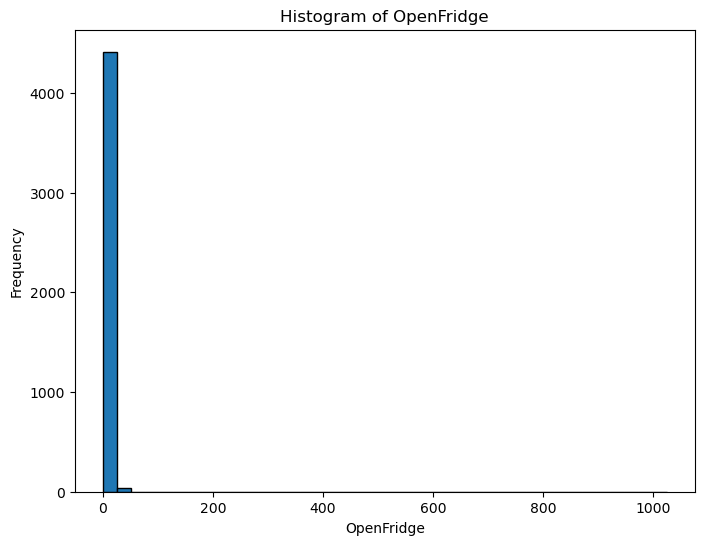

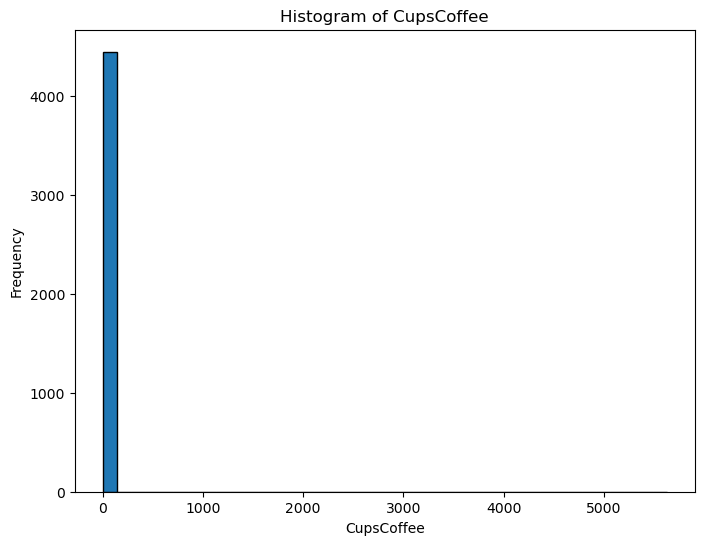

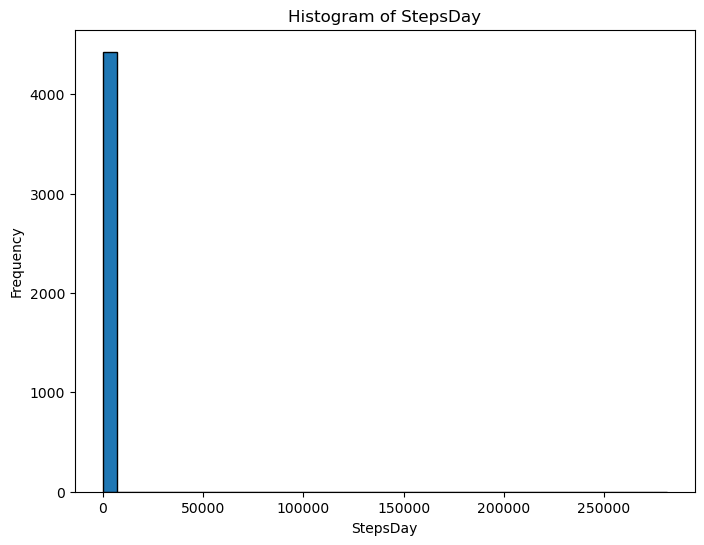

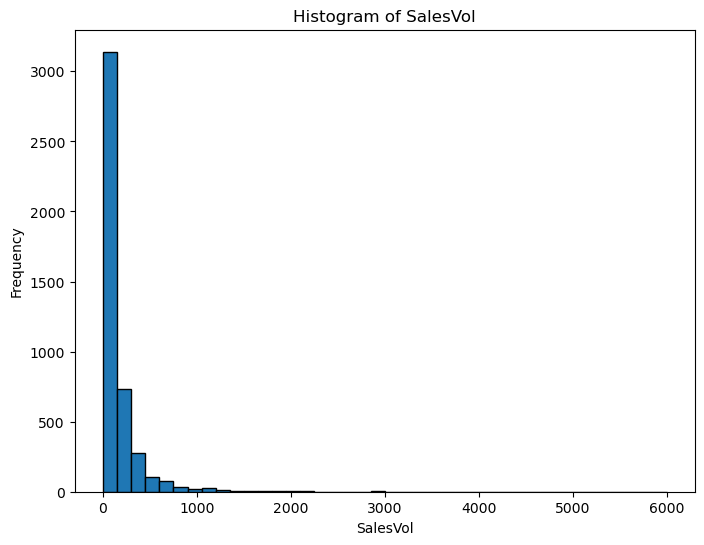

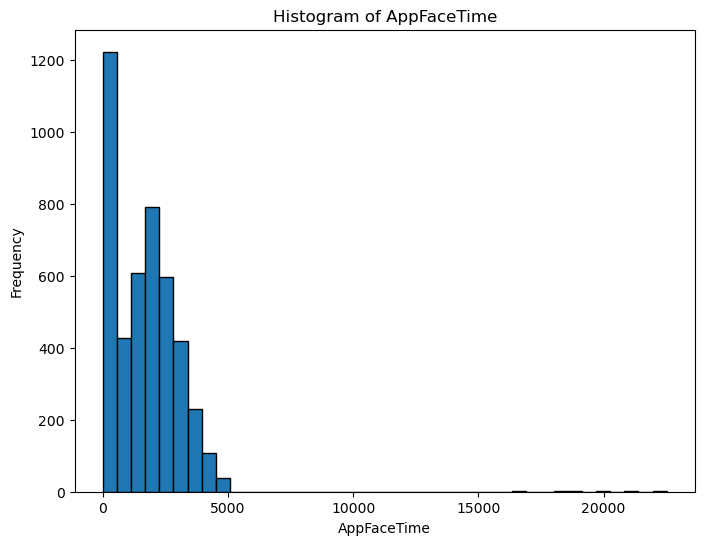

In [19]:
columns_to_plot = ['OpenFridge', 'CupsCoffee', 'StepsDay', 'SalesVol', 'AppFaceTime']

# Erstelle einzelne Histogramme für jede Spalte
for column in columns_to_plot:
    plt.figure(figsize=(8, 6))
    original[column].hist(bins=40, edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.show()

In [20]:
percentile_99_openfridge = original['OpenFridge'].quantile(0.99)
original['OpenFridge'] = original['OpenFridge'].clip(upper=percentile_99_openfridge)

In [21]:
percentile_99_cupscoffee = original['CupsCoffee'].quantile(0.99)
original['CupsCoffee'] = original['CupsCoffee'].clip(upper=percentile_99_cupscoffee)

In [22]:
percentile_99_stepsday = original['StepsDay'].quantile(0.99)
original['StepsDay'] = original['StepsDay'].clip(upper=percentile_99_stepsday)

In [23]:
percentile_99_salesvol = original['SalesVol'].quantile(0.99)
original['SalesVol'] = original['SalesVol'].clip(upper=percentile_99_salesvol)

In [24]:
percentile_99_appfacetime = original['AppFaceTime'].quantile(0.99)
original['AppFaceTime'] = original['AppFaceTime'].clip(upper=percentile_99_appfacetime)

In [25]:
percentile_99_sleepnight = original['SleepNight'].quantile(0.99)
original['SleepNight'] = original['SleepNight'].clip(upper=percentile_99_sleepnight)

In [26]:
original.describe().T

,count,mean,std,min,25%,50%,75%,max
Individuals,4449.0,2.966734,0.920524,1.0,2.0,3.0,3.0,6.00
Adults,4449.0,1.905822,0.292110,1.0,2.0,2.0,2.0,2.00
OpenFridge,4449.0,18.297370,3.990647,0.0,16.0,19.0,21.0,25.00
UsedOven,4449.0,4.337154,1.367686,0.0,4.0,5.0,5.0,7.00
CupsCoffee,4449.0,10.071702,1.503004,3.0,9.0,10.0,11.0,13.00
CoffeeStrength,4449.0,1.993032,0.627026,1.0,2.0,2.0,2.0,3.00
StepsDay,4449.0,4963.374241,636.143642,0.0,4570.0,4935.0,5380.0,6432.60
SleepNight,4449.0,7.938413,0.506949,7.0,8.0,8.0,8.0,9.00
Product1,4449.0,4.532479,1.720953,0.0,4.0,5.0,6.0,10.00
Product2,4449.0,10.201843,1.248087,7.0,9.0,10.0,11.0,16.00


In [27]:
data_clean = original.copy()

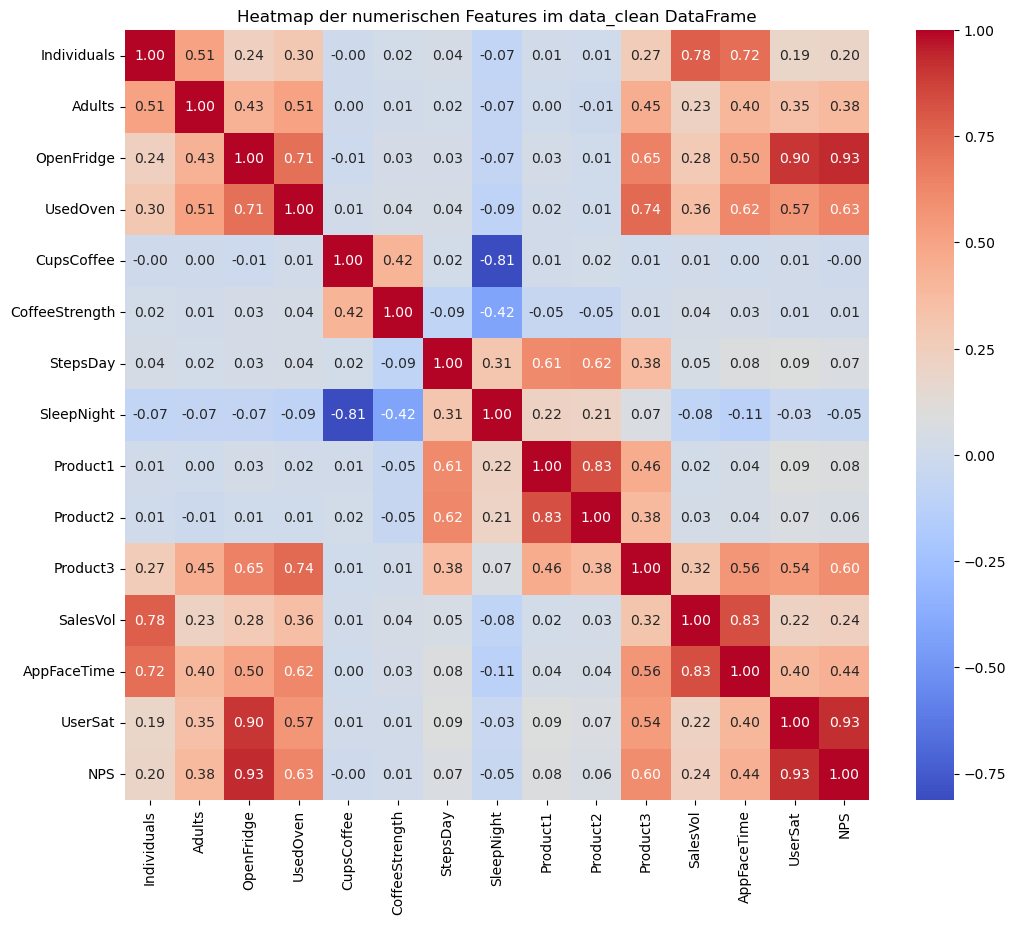

In [28]:
# Ensure numerical_columns contains only valid columns from data_clean
numerical_columns = data_clean.select_dtypes(include=['float64', 'int64']).columns

# Berechnung der Korrelationsmatrix für numerische Features im data_clean DataFrame
correlation_matrix = data_clean[numerical_columns].corr()

# Erstellen der Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Heatmap der numerischen Features im data_clean DataFrame")
plt.show()

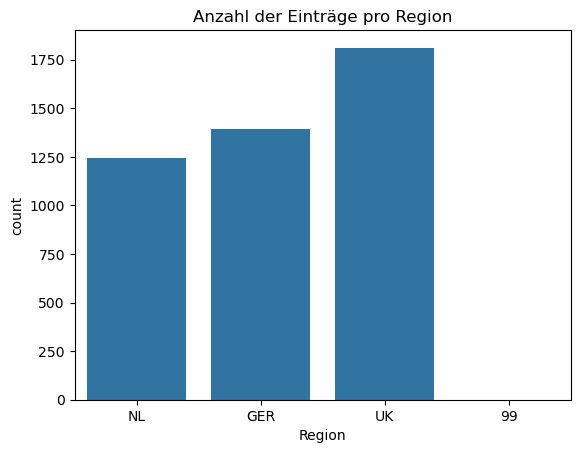

In [29]:
sns.countplot(x='Region', data=data_clean)
plt.title('Anzahl der Einträge pro Region')
plt.show()

In [30]:
count_99_region = data_clean['Region'].value_counts().get('99', 0)
print(f"Anzahl der '99' Werte in der Spalte 'Region': {count_99_region}")

Anzahl der '99' Werte in der Spalte 'Region': 1


In [31]:
# Entferne Zeilen, in denen der Wert '99' in der Spalte 'Region' vorkommt
data_clean = data_clean[data_clean['Region'] != '99']

# Optional: Index zurücksetzen
data_clean.reset_index(drop=True, inplace=True)

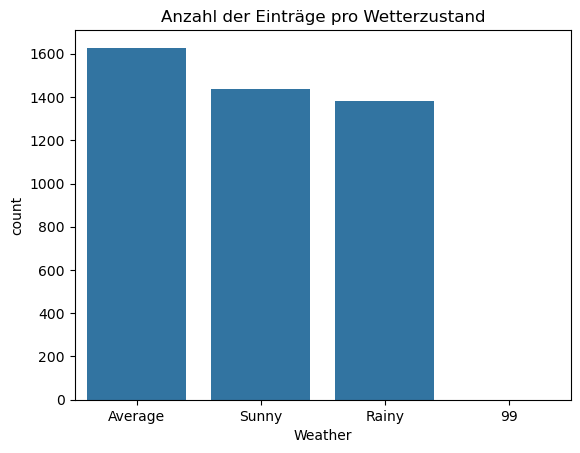

In [32]:
sns.countplot(x='Weather', data=data_clean)
plt.title('Anzahl der Einträge pro Wetterzustand')
plt.show()

In [33]:
count_99_weather = data_clean['Weather'].value_counts().get('99', 0)
print(f"Anzahl der '99' Werte in der Spalte 'Weather': {count_99_weather}")

Anzahl der '99' Werte in der Spalte 'Weather': 1


In [34]:
# Entferne Zeilen, in denen der Wert '99' in der Spalte 'Weather' vorkommt
data_clean = data_clean[data_clean['Weather'] != '99']

# Optional: Index zurücksetzen
data_clean.reset_index(drop=True, inplace=True)

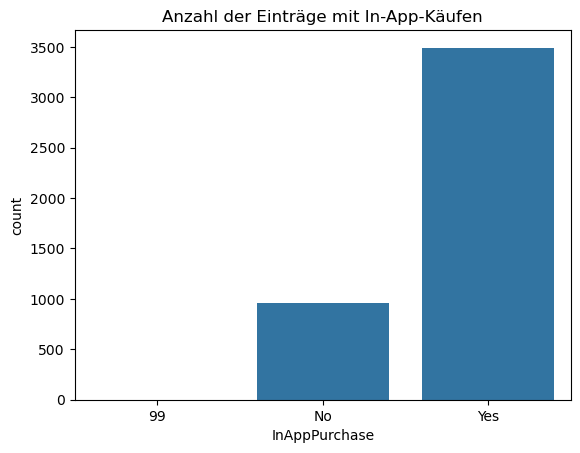

In [35]:
sns.countplot(x='InAppPurchase', data=data_clean)
plt.title('Anzahl der Einträge mit In-App-Käufen')
plt.show()

In [36]:
# Entferne Zeilen, in denen der Wert '99' in der Spalte 'InAppPurchase' vorkommt
data_clean = data_clean[data_clean['InAppPurchase'] != '99']

# Optional: Index zurücksetzen
data_clean.reset_index(drop=True, inplace=True)

In [37]:
data_clean.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Individuals,4446.0,NaN,NaN,NaN,2.965812,0.919579,1.0,2.0,3.0,3.0,6.0
Adults,4446.0,NaN,NaN,NaN,1.905758,0.292198,1.0,2.0,2.0,2.0,2.0
Region,4446,3,UK,1811,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OpenFridge,4446.0,NaN,NaN,NaN,18.295322,3.990519,0.0,16.0,19.0,21.0,25.0
UsedOven,4446.0,NaN,NaN,NaN,4.336707,1.368039,0.0,4.0,5.0,5.0,7.0
CupsCoffee,4446.0,NaN,NaN,NaN,10.07085,1.502804,3.0,9.0,10.0,11.0,13.0
CoffeeStrength,4446.0,NaN,NaN,NaN,1.992803,0.627056,1.0,2.0,2.0,2.0,3.0
StepsDay,4446.0,NaN,NaN,NaN,4963.016059,635.905095,0.0,4570.0,4935.0,5380.0,6432.6
SleepNight,4446.0,NaN,NaN,NaN,7.938596,0.506923,7.0,8.0,8.0,8.0,9.0
Weather,4446,3,Average,1627,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
data_clean.head(20)

,Individuals,Adults,Region,OpenFridge,UsedOven,CupsCoffee,CoffeeStrength,StepsDay,SleepNight,Weather,Product1,Product2,Product3,InAppPurchase,SalesVol,AppFaceTime,UserSat,NPS
0,4.0,2.0,GER,14.0,2.0,11.0,2.0,5750.0,8.0,Sunny,7.0,15.0,9.0,No,0.0,0.0,5,3
1,1.0,1.0,UK,12.0,2.0,11.0,2.0,5545.0,8.0,Average,6.0,11.0,9.0,No,0.0,123.0,4,1
2,3.0,2.0,GER,13.0,2.0,10.0,2.0,4265.0,8.0,Sunny,4.0,10.0,0.0,No,0.0,300.0,5,2
3,1.0,1.0,GER,12.0,2.0,13.0,2.0,3950.0,7.0,Sunny,3.0,9.0,0.0,No,0.0,0.0,4,1
4,2.0,2.0,GER,14.0,2.0,6.0,2.0,6305.0,9.0,Sunny,8.0,14.0,10.0,No,0.0,0.0,5,3
5,4.0,2.0,UK,13.0,2.0,12.0,2.0,6432.6,8.0,Sunny,9.0,10.0,10.0,No,0.0,0.0,5,3
6,1.0,1.0,GER,12.0,2.0,10.0,1.0,4905.0,8.0,Average,5.0,10.0,7.0,No,0.0,142.0,4,1
7,4.0,2.0,GER,13.0,2.0,10.0,2.0,4465.0,8.0,Average,4.0,10.0,0.0,No,0.0,0.0,5,2
8,2.0,2.0,GER,13.0,2.0,8.0,2.0,5305.0,9.0,Rainy,1.0,9.0,0.0,No,0.0,348.0,5,1
9,4.0,2.0,GER,12.0,2.0,10.0,2.0,4910.0,8.0,Average,5.0,10.0,7.0,No,0.0,0.0,4,1


In [39]:
data_clean['InAppPurchase'] = data_clean['InAppPurchase'].map({'No': 0, 'Yes': 1})

In [40]:
data_clean.head(20)

,Individuals,Adults,Region,OpenFridge,UsedOven,CupsCoffee,CoffeeStrength,StepsDay,SleepNight,Weather,Product1,Product2,Product3,InAppPurchase,SalesVol,AppFaceTime,UserSat,NPS
0,4.0,2.0,GER,14.0,2.0,11.0,2.0,5750.0,8.0,Sunny,7.0,15.0,9.0,0,0.0,0.0,5,3
1,1.0,1.0,UK,12.0,2.0,11.0,2.0,5545.0,8.0,Average,6.0,11.0,9.0,0,0.0,123.0,4,1
2,3.0,2.0,GER,13.0,2.0,10.0,2.0,4265.0,8.0,Sunny,4.0,10.0,0.0,0,0.0,300.0,5,2
3,1.0,1.0,GER,12.0,2.0,13.0,2.0,3950.0,7.0,Sunny,3.0,9.0,0.0,0,0.0,0.0,4,1
4,2.0,2.0,GER,14.0,2.0,6.0,2.0,6305.0,9.0,Sunny,8.0,14.0,10.0,0,0.0,0.0,5,3
5,4.0,2.0,UK,13.0,2.0,12.0,2.0,6432.6,8.0,Sunny,9.0,10.0,10.0,0,0.0,0.0,5,3
6,1.0,1.0,GER,12.0,2.0,10.0,1.0,4905.0,8.0,Average,5.0,10.0,7.0,0,0.0,142.0,4,1
7,4.0,2.0,GER,13.0,2.0,10.0,2.0,4465.0,8.0,Average,4.0,10.0,0.0,0,0.0,0.0,5,2
8,2.0,2.0,GER,13.0,2.0,8.0,2.0,5305.0,9.0,Rainy,1.0,9.0,0.0,0,0.0,348.0,5,1
9,4.0,2.0,GER,12.0,2.0,10.0,2.0,4910.0,8.0,Average,5.0,10.0,7.0,0,0.0,0.0,4,1


In [41]:
data_enc = data_clean.copy()

# Erstelle Dummy-Variablen für die Spalten 'Weather' und 'Region'
data_enc = pd.get_dummies(data_clean, columns=['Weather', 'Region'], drop_first=True)

In [42]:
data_enc.head(20)

,Individuals,Adults,OpenFridge,UsedOven,CupsCoffee,CoffeeStrength,StepsDay,SleepNight,Product1,Product2,Product3,InAppPurchase,SalesVol,AppFaceTime,UserSat,NPS,Weather_Rainy,Weather_Sunny,Region_NL,Region_UK
0,4.0,2.0,14.0,2.0,11.0,2.0,5750.0,8.0,7.0,15.0,9.0,0,0.0,0.0,5,3,False,True,False,False
1,1.0,1.0,12.0,2.0,11.0,2.0,5545.0,8.0,6.0,11.0,9.0,0,0.0,123.0,4,1,False,False,False,True
2,3.0,2.0,13.0,2.0,10.0,2.0,4265.0,8.0,4.0,10.0,0.0,0,0.0,300.0,5,2,False,True,False,False
3,1.0,1.0,12.0,2.0,13.0,2.0,3950.0,7.0,3.0,9.0,0.0,0,0.0,0.0,4,1,False,True,False,False
4,2.0,2.0,14.0,2.0,6.0,2.0,6305.0,9.0,8.0,14.0,10.0,0,0.0,0.0,5,3,False,True,False,False
5,4.0,2.0,13.0,2.0,12.0,2.0,6432.6,8.0,9.0,10.0,10.0,0,0.0,0.0,5,3,False,True,False,True
6,1.0,1.0,12.0,2.0,10.0,1.0,4905.0,8.0,5.0,10.0,7.0,0,0.0,142.0,4,1,False,False,False,False
7,4.0,2.0,13.0,2.0,10.0,2.0,4465.0,8.0,4.0,10.0,0.0,0,0.0,0.0,5,2,False,False,False,False
8,2.0,2.0,13.0,2.0,8.0,2.0,5305.0,9.0,1.0,9.0,0.0,0,0.0,348.0,5,1,True,False,False,False
9,4.0,2.0,12.0,2.0,10.0,2.0,4910.0,8.0,5.0,10.0,7.0,0,0.0,0.0,4,1,False,False,False,False


Multicoli Klassifikation Zielvariable Purchase

In [43]:
target = 'InAppPurchase'

numeric_features = data_clean.select_dtypes(include=['float64', 'int64']).drop(columns=[target], errors='ignore')
# Add constant (intercept) term
df_const = add_constant(numeric_features)

# Compute VIF for each feature
vif_data = pd.DataFrame({
    'Feature': df_const.columns,
    'VIF': [
        variance_inflation_factor(df_const.values, i)
        for i in range(df_const.shape[1])
    ]
})

print(vif_data)

           Feature          VIF
0            const  2166.808091
1      Individuals     4.205329
2           Adults     2.215012
3       OpenFridge    12.070826
4         UsedOven     3.978624
5       CupsCoffee     4.321298
6   CoffeeStrength     1.246886
7         StepsDay     2.204722
8       SleepNight     4.914206
9         Product1     4.191295
10        Product2     3.433845
11        Product3     5.425350
12        SalesVol     5.350969
13     AppFaceTime     6.507668
14         UserSat     8.345646
15             NPS    11.176935


### Models for machine learning

Splitting data for the training

Train/Test Split

In [44]:
# -----------------------------------------
# 1. Daten laden & Zielvariable vorbereiten
# -----------------------------------------
df = pd.read_csv("Smart_Home_Data.csv")
df = df[df['InAppPurchase'].notna()]
df['InAppPurchase'] = df['InAppPurchase'].map({'Yes': 1, 'No': 0})

# -----------------------------------------
# 2. Feature-Auswahl (angepasst an VIF)
# -----------------------------------------
features = [
    'Individuals', 'Adults', 'UsedOven', 'CupsCoffee', 'CoffeeStrength',
    'StepsDay', 'SleepNight', 'Product1', 'Product2', 'Product3'
]
df = df[features + ['InAppPurchase']].dropna()
X = df[features]
y = df['InAppPurchase']

# Zielverteilung prüfen
print("Zielverteilung:")
print(y.value_counts(normalize=True))

# -----------------------------------------
# 3. Train/Test Split (einmalig für alles)
# -----------------------------------------
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Zielverteilung:
InAppPurchase
1.0    0.77644
0.0    0.22356
Name: proportion, dtype: float64


In [45]:

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.940733772342427

Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.87      0.87       254
         1.0       0.96      0.96      0.96       809

    accuracy                           0.94      1063
   macro avg       0.92      0.92      0.92      1063
weighted avg       0.94      0.94      0.94      1063



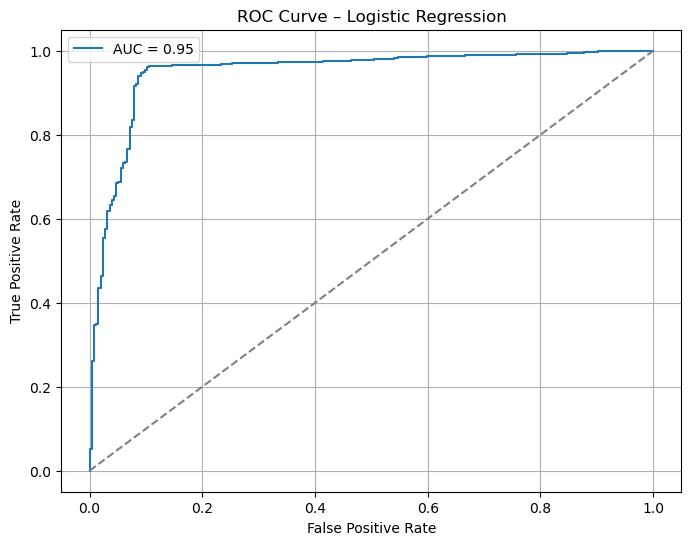

In [46]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()

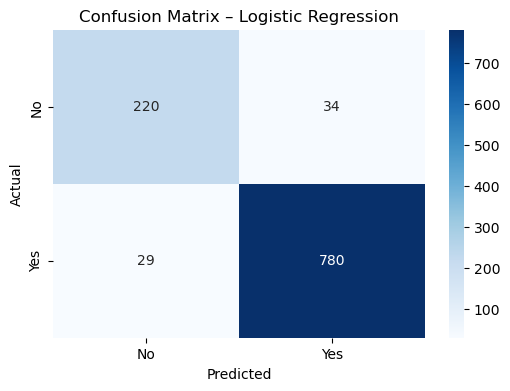

In [47]:
# 1. Confusion Matrix berechnen
cm = confusion_matrix(y_test, y_pred)

# 2. Plot
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Logistic Regression")
plt.show()

🔍 Random Forest Accuracy: 0.9388523047977423

Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.87      0.87       254
         1.0       0.96      0.96      0.96       809

    accuracy                           0.94      1063
   macro avg       0.92      0.91      0.92      1063
weighted avg       0.94      0.94      0.94      1063



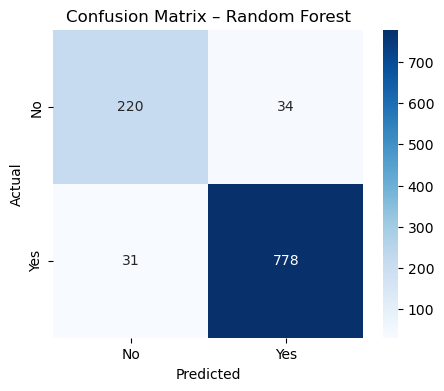

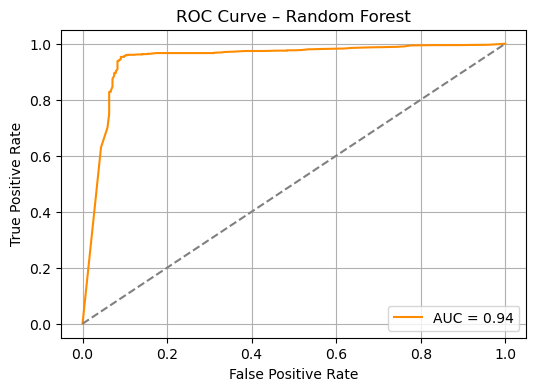

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_curve, auc
)
import matplotlib.pyplot as plt
import seaborn as sns

# Modell trainieren
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Accuracy
print("🔍 Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix (Plot)
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title("Confusion Matrix – Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(6, 4))
plt.plot(fpr_rf, tpr_rf, label=f"AUC = {roc_auc_rf:.2f}", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve – Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


🔍 XGBoost Accuracy: 0.9397930385700847

Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.87      0.87       254
         1.0       0.96      0.96      0.96       809

    accuracy                           0.94      1063
   macro avg       0.92      0.91      0.92      1063
weighted avg       0.94      0.94      0.94      1063



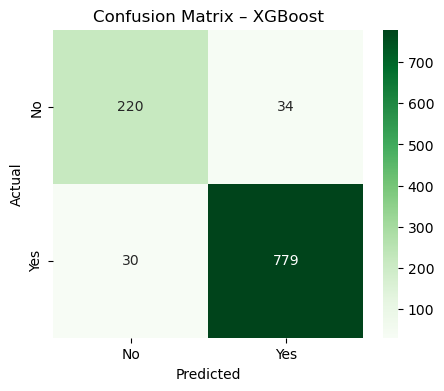

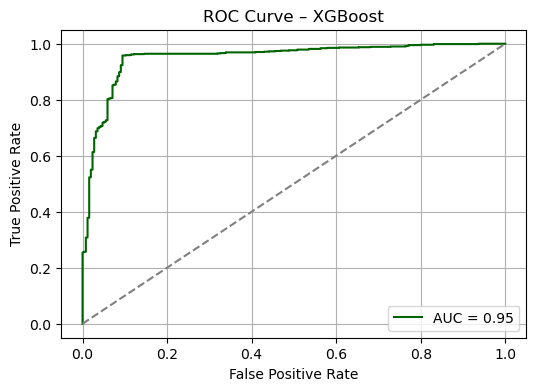

In [49]:
from xgboost import XGBClassifier

# Modell trainieren
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Accuracy
print("🔍 XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

# Confusion Matrix (Plot)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Greens', xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title("Confusion Matrix – XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(6, 4))
plt.plot(fpr_xgb, tpr_xgb, label=f"AUC = {roc_auc_xgb:.2f}", color='darkgreen')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve – XGBoost")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score


# Zielvariable binär kodieren
df = df[df['InAppPurchase'].notna()]
df['InAppPurchase'] = df['InAppPurchase'].map({'Yes': 1, 'No': 0})

# Feature-Auswahl
features = [
    'Individuals', 'Adults', 'UsedOven', 'CupsCoffee', 'CoffeeStrength',
    'StepsDay', 'SleepNight', 'Product1', 'Product2', 'Product3'
]
df = df[features + ['InAppPurchase']].dropna()
X = df[features]
y = df['InAppPurchase']


# -------------------------------
# Modelle definieren
# -------------------------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=50, max_depth=3, use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# -------------------------------
# Modelle trainieren & evaluieren
# -------------------------------
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    report = classification_report(y_test, y_pred, output_dict=True)

    results.append({
        "Modell": name,
        "Accuracy": round(acc, 4),
        "AUC": round(auc, 4),
        "F1-Score (Käufer)": round(report["1.0"]["f1-score"], 4),
        "Precision (Käufer)": round(report["1.0"]["precision"], 4),
        "Recall (Käufer)": round(report["1.0"]["recall"], 4)
    })

# -------------------------------
# Ergebnisse anzeigen
# -------------------------------
comparison_df = pd.DataFrame(results)
print(comparison_df)


                Modell  Accuracy     AUC  F1-Score (Käufer)  \
0  Logistic Regression    0.9407  0.9491             0.9612   
1        Random Forest    0.9389  0.9427             0.9599   
2              XGBoost    0.9492  0.9535             0.9665   

   Precision (Käufer)  Recall (Käufer)  
0              0.9582           0.9642  
1              0.9581           0.9617  
2              0.9713           0.9617  


### Businessfazit und Handlungsempfehlung

📈 Ergebnisse im Überblick:
Alle Modelle erreichen eine Accuracy von ca. 93–95 %

Die Recall-Werte für Käufer sind hoch → kaum echte Käufer werden übersehen

AUC-Werte > 0.9 belegen eine starke Trennschärfe zwischen Käufern und Nicht-Käufern

➡️ Die Modelle liefern stabile, robuste Vorhersagen und sind einsatzbereit für produktive Anwendungen im Smart-Home-Marketing.

💡 Nutzen:
Höhere Conversion-Rates durch zielgenaues Targeting

Vermeidung von Streuverlusten & Kundenirritation

Effizienter Einsatz von Marketingbudgets

Automatisierte Empfehlungen direkt in der App oder per E-Mail



| Bereich          | Empfehlung                                                                                                                |
| ---------------- | ------------------------------------------------------------------------------------------------------------------------- |
| **Marketing**    | Nutze das Modell, um kaufbereite Haushalte zu identifizieren und gezielt zu bewerben (z. B. Push-Nachricht, Rabattaktion) 
|
| **Produktteam**  | Entwickle auf In-App-Verhalten abgestimmte Angebote (z. B. für „CoffeeStrength“ oder „StepsDay“)                          |
| **Technik/IT**   | Integriere das Modell in die Smart-Home-Plattform (z. B. als REST-API oder Batch-Scoring-Modul)                           |
| **Datenanalyse** | Überwache Modellleistung regelmäßig (z. B. Drift, Feature-Stabilität, Nutzerverhalten)                                    |
| **Management**   | Plane ein Pilotprojekt zur Erfolgsmessung (KPIs: Umsatz, Conversion, Nutzerbindung)                                       |
